<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="https://www.uoc.edu/content/dam/news/images/noticies/2016/202-nova-marca-uoc.jpg", align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">M2.879 · TFM - Área 2 - Aula 1</p>
<p style="margin: 0; text-align:right;">2023-2 · Máster universitario en Ciencia de datos (<i>Data science</i>)</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudios de Informática, Multimedia y Telecomunicación</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>


# **SEGUNDO AVANCE PRODUCTO TFM EN CIENCIA DE DATOS**


Título: **CSNN y Sostenibilidad en Conducción Autónoma**

Presentado por: **Andres Ricardo Sanabria Garay**

Tutor: **Raúl Parada Medina**

En este documento inicialmente reproducimos las operaciones hechas en el primer avance del producto y que se fundamenta en el trabajo de Master Universitario en Ciencia de Datos de la UOC de Fernando Sevilla Martínez, titulado: "Conducción autónoma mediante redes convolucionales y clonación del comportamiento con Unity y Udacity" presentado en junio de 2022 y cuyo tutor fue Raúl Parada Medina. Por tanto, no entraremos en detalle en estos apartados del código ya que fueron objeto de la entrega anterior y con las que se carga y transforma el conjunto de datos.

<br>

En la segunda parte, analizamos la codificación de los datos en spikes (o impulsos). En esta sección, examinamos la librería snnTorch y luego revisamos los diferentes tipos de codificación en spikes que tenemos con esta librería.

<br>

Finalmente, procedemos con la instalación de la librería y con la codificación de los datos, almacenando los mismos en un repositorio para que se puedan emplear en otros escenarios.

# ETAPA DE CARGA Y TRANSFOMARCIÓN DE DATOS



# Cargando y transformando datos de conducción autonoma para entrenar redes neuronales



## Carga de datos



In [ ]:
# Mounting Google Drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%%capture
!unzip "/content/drive/MyDrive/UOC/TFM/Dataset/TrainImagesTFM_1_2.zip" -d "/content"

In [ ]:
import pandas as pd

def load_driving_data(csv_file_path):
    """
    Carga los datos de conducción desde un archivo CSV y retorna un DataFrame.

    Parámetros:
        csv_file_path (str): La ruta al archivo CSV que contiene los datos de conducción.

    Retorna:
        DataFrame: Un DataFrame de pandas con las columnas renombradas adecuadamente.
    """
    # Carga el archivo CSV
    data = pd.read_csv(csv_file_path)

    # Renombra las columnas para mejor claridad
    data.columns = [
        'center_image',  # Ruta de la imagen central
        'left_image',    # Ruta de la imagen izquierda
        'right_image',   # Ruta de la imagen derecha
        'steering_angle',  # Ángulo del volante
        'throttle',        # Aceleración
        'brake',           # Frenado
        'speed'            # Velocidad del vehículo
    ]

    return data

# Ruta al archivo descomprimido en /content
csv_file_path = '/content/TrainImagesTFM_1_2/driving_log.csv'
driving_data = load_driving_data(csv_file_path)
print(driving_data.head())

                                        center_image  \
0  /Users/fernandosevilla/UOC/UOC Repositorio asi...   
1  /Users/fernandosevilla/UOC/UOC Repositorio asi...   
2  /Users/fernandosevilla/UOC/UOC Repositorio asi...   
3  /Users/fernandosevilla/UOC/UOC Repositorio asi...   
4  /Users/fernandosevilla/UOC/UOC Repositorio asi...   

                                          left_image  \
0  /Users/fernandosevilla/UOC/UOC Repositorio asi...   
1  /Users/fernandosevilla/UOC/UOC Repositorio asi...   
2  /Users/fernandosevilla/UOC/UOC Repositorio asi...   
3  /Users/fernandosevilla/UOC/UOC Repositorio asi...   
4  /Users/fernandosevilla/UOC/UOC Repositorio asi...   

                                         right_image  steering_angle  \
0  /Users/fernandosevilla/UOC/UOC Repositorio asi...             0.0   
1  /Users/fernandosevilla/UOC/UOC Repositorio asi...             0.0   
2  /Users/fernandosevilla/UOC/UOC Repositorio asi...             0.0   
3  /Users/fernandosevilla/UOC/UOC Repo

## Ajustes en el dataframe



In [ ]:
def simplify_image_path(dataframe, columns):
    """
    Modifica las rutas de las imágenes en el DataFrame para dejar solo los nombres de archivo.

    Parámetros:
        dataframe (pd.DataFrame): DataFrame que contiene las rutas completas de las imágenes.
        columns (list): Lista de nombres de columnas que contienen las rutas de las imágenes.

    Retorna:
        pd.DataFrame: DataFrame actualizado con solo los nombres de archivo en las columnas especificadas.
    """
    for column in columns:
        # Extraemos solo el nombre del archivo de cada ruta
        dataframe[column] = dataframe[column].apply(lambda x: x.split('/')[-1])
    return dataframe

# Nombres de las columnas de imágenes
image_columns = ['center_image', 'left_image', 'right_image']

# Aplicando la función al DataFrame
driving_data = simplify_image_path(driving_data, image_columns)

# Mostrar las primeras filas del DataFrame para verificar los cambios
print(driving_data.head())


                         center_image                        left_image  \
0  center_2022_04_30_19_01_57_321.jpg  left_2022_04_30_19_01_57_321.jpg   
1  center_2022_04_30_19_01_57_389.jpg  left_2022_04_30_19_01_57_389.jpg   
2  center_2022_04_30_19_01_57_471.jpg  left_2022_04_30_19_01_57_471.jpg   
3  center_2022_04_30_19_01_57_538.jpg  left_2022_04_30_19_01_57_538.jpg   
4  center_2022_04_30_19_01_57_621.jpg  left_2022_04_30_19_01_57_621.jpg   

                         right_image  steering_angle  throttle  brake  \
0  right_2022_04_30_19_01_57_321.jpg             0.0       0.0    0.0   
1  right_2022_04_30_19_01_57_389.jpg             0.0       0.0    0.0   
2  right_2022_04_30_19_01_57_471.jpg             0.0       0.0    0.0   
3  right_2022_04_30_19_01_57_538.jpg             0.0       0.0    0.0   
4  right_2022_04_30_19_01_57_621.jpg             0.0       0.0    0.0   

      speed  
0  0.000007  
1  0.000008  
2  0.000008  
3  0.000009  
4  0.000007  


## Análisis de los datos del log


In [ ]:
print(driving_data.describe())

       steering_angle      throttle         brake         speed
count    12945.000000  12945.000000  12945.000000  12945.000000
mean        -0.010260      0.474558      0.010656     23.228469
std          0.293935      0.466944      0.095999      7.111932
min         -1.000000      0.000000      0.000000      0.000006
25%          0.000000      0.000000      0.000000     17.380540
50%          0.000000      0.351500      0.000000     24.917880
75%          0.000000      1.000000      0.000000     30.189880
max          1.000000      1.000000      1.000000     30.606040


Contamos con 12945 imágenes de cada una de las cámaras del vehículo para un total de 38835 imágenes

In [ ]:
print(driving_data.isnull().sum())

center_image      0
left_image        0
right_image       0
steering_angle    0
throttle          0
brake             0
speed             0
dtype: int64


No se identifican valores nulos

La correlación directa más fuerte se presenta entre la aceleración y la velocidad como era de esperarse, a mayor aceleración mayor velocidad. La correlación inversa más fuerte es entre la frenada (brake) y la velocidad (speed), lo podemos ver como a mayor frenado menor velocidad.

## Carácterísticas de los datos de conducción


In [ ]:
def categorize_turns(data, angle_column):
    """
    Categoriza los ángulos de giro en un DataFrame y cuenta las ocurrencias de cada categoría.

    Parámetros:
        data (pd.DataFrame): DataFrame que contiene los datos de conducción.
        angle_column (str): Nombre de la columna en el DataFrame que contiene los ángulos del volante.

    Retorna:
        pd.Series: Conteo de ocurrencias de cada categoría de giro.
    """
    # Definir los límites y las etiquetas para las categorías de giro
    bins = [-float('inf'), -0.1, 0.1, float('inf')]
    labels = ['Left Turn', 'Straight', 'Right Turn']

    # Categorizar los ángulos usando pd.cut
    data['turn_category'] = pd.cut(data[angle_column], bins=bins, labels=labels)

    # Contar las ocurrencias de cada categoría
    turn_counts = data['turn_category'].value_counts()

    return turn_counts

# Uso de la función
turn_counts = categorize_turns(driving_data, 'steering_angle')
print(turn_counts)


turn_category
Straight      8066
Left Turn     2674
Right Turn    2205
Name: count, dtype: int64


In [ ]:
def balance_data_by_replication(data, category_column, target_size=None):
    """
    Equilibra un DataFrame replicando registros en categorías menos representadas hasta alcanzar un tamaño objetivo.

    Parámetros:
        data (pd.DataFrame): DataFrame que contiene los datos a equilibrar.
        category_column (str): Nombre de la columna que contiene las categorías de datos.
        target_size (int, opcional): Número deseado de registros por categoría. Si no se especifica, se usará el tamaño de la categoría más grande.

    Retorna:
        pd.DataFrame: Un DataFrame equilibrado.
    """
    # Dividir el DataFrame por categoría
    categories = data[category_column].unique()
    subset_list = [data[data[category_column] == category] for category in categories]

    # Si no se proporciona un tamaño objetivo, usar el tamaño de la categoría más grande
    if not target_size:
        target_size = max(subset.shape[0] for subset in subset_list)

    # Replicar registros en cada subconjunto si es necesario
    balanced_subsets = [subset.sample(target_size, replace=True) if subset.shape[0] < target_size else subset for subset in subset_list]

    # Combinar todos los subconjuntos en un solo DataFrame
    balanced_data = pd.concat(balanced_subsets, ignore_index=True)

    return balanced_data

# Uso de la función
category_column = 'turn_category'
balanced_driving_data = balance_data_by_replication(driving_data, category_column)
print(balanced_driving_data['turn_category'].value_counts())


turn_category
Left Turn     8066
Straight      8066
Right Turn    8066
Name: count, dtype: int64


In [ ]:
import numpy as np

def calculate_samples_per_bin(df, steering_col, num_bins, percentile):
    """
    Calcula el número máximo de muestras por bin basado en un percentil dado.

    Args:
        df (pd.DataFrame): DataFrame que contiene los datos.
        steering_col (str): Columna de ángulos de dirección.
        num_bins (int): Número de bins para agrupar los datos.
        percentile (float): Percentil para calcular el límite de muestras por bin.

    Returns:
        int: Número de muestras por bin.
    """
    hist, _ = np.histogram(df[steering_col], bins=num_bins)
    max_samples = np.percentile(hist, percentile)
    return int(max_samples)

# Uso de la función
percentile = 90
num_bins = 25
max_samples_per_bin = calculate_samples_per_bin(balanced_driving_data, 'steering_angle', num_bins, percentile)
print("Número máximo de muestras por bin calculado:", max_samples_per_bin)


Número máximo de muestras por bin calculado: 1428


In [ ]:
from sklearn.utils import shuffle

def remove_samples(df, num_bins=25, samples_per_bin=1500, steering_col='steering_angle'):
    """
    Ajusta la distribución de los ángulos de dirección para que sea más uniforme limitando el número de muestras por bin.

    Argumentos:
        df (pd.DataFrame): DataFrame que contiene los datos del ángulo de dirección.
        num_bins (int): Número de bins para agrupar los datos.
        samples_per_bin (int): Número máximo de muestras permitidas por bin.
        steering_col (str): Nombre de la columna para los ángulos de dirección.

    Devuelve:
        pd.DataFrame: DataFrame ajustado con una distribución más uniforme de los ángulos de dirección.
    """
    df.reset_index(drop=True, inplace=True)
    hist, bins = np.histogram(df[steering_col], bins=num_bins)
    center = (bins[:-1] + bins[1:]) / 2
    remove_list = []
    for j in range(num_bins):
        list_indices = []
        for i in range(len(df[steering_col])):
            if bins[j] <= df[steering_col].iloc[i] < bins[j + 1]:
                list_indices.append(i)
        list_indices = shuffle(list_indices)
        list_indices = list_indices[samples_per_bin:]
        remove_list.extend(list_indices)

    # Eliminar los índices seleccionados
    df.drop(df.index[remove_list], inplace=True)

    return df

# Aplicar la función al conjunto de datos de conducción equilibrado
balanced_data_adjusted = remove_samples(balanced_driving_data)


Siguiendo la metodología propuesta por Sevilla Martínez incorporamos valores de offset a las imágenes de las cámaras derecha e izquierda

In [ ]:
import os

def load_img_steering(datadir, df):
    """
    Asocia cada imagen de las cámaras central, izquierda y derecha con un ángulo de giro ajustado.
    - Para la cámara central, se utiliza el ángulo directamente.
    - Para la cámara izquierda, se suma un offset para simular un giro más hacia la derecha.
    - Para la cámara derecha, se resta un offset para simular un giro más hacia la izquierda.

    Args:
        datadir (str): Ruta al directorio que contiene las imágenes.
        df (DataFrame): DataFrame que contiene los nombres de cada imagen y su ángulo de giro relacionado.

    Returns:
        tuple: Dos arrays, uno con las rutas de las imágenes y otro con los ángulos de giro ajustados.
    """
    image_path = []
    steering = []

    for i in range(len(df)):
        indexed_data = df.iloc[i]
        center, left, right = indexed_data[0], indexed_data[1], indexed_data[2]
        image_path.append(os.path.join(datadir, center.strip()))
        steering.append(float(indexed_data[3]))
        image_path.append(os.path.join(datadir, left.strip()))
        steering.append(float(indexed_data[3]) + 0.2)  # Offset para la cámara izquierda
        image_path.append(os.path.join(datadir, right.strip()))
        steering.append(float(indexed_data[3]) - 0.2)  # Offset para la cámara derecha

    return np.array(image_path), np.array(steering)

offset_data_adjust = load_img_steering("/content/TrainImagesTFM_1_2/IMG/", balanced_data_adjusted)


## Conjuntos de entrenamiento y prueba

Como lo hizo Sevilla Martinez esta listas sirven de entrada a otra función con la que se generan los conjuntos de entrenamiento y prueba como se muestra a continuación:

In [ ]:
from sklearn.model_selection import train_test_split


def trainValSample(dir, df):
    """
    Crea datos de entrenamiento y validación buscando en el directorio las imágenes del DataFrame.

    Argumentos:
        dir (str): Ruta al directorio donde se encuentran las imágenes.
        df (DataFrame): DataFrame con el nombre de la imagen a buscar.

    Devuelve:
        tuple: Retorna los caminos de las imágenes, ángulos de dirección, y divisiones de entrenamiento y validación.
    """
    # Asegúrate de que la ruta termine correctamente
    if not dir.endswith("/"):
        dir += "/"

    # Carga las imágenes y los ángulos de giro
    image_paths, steerings = load_img_steering(dir + "IMG/", df)

    # Divide los datos en conjuntos de entrenamiento y validación
    X_train, X_valid, y_train, y_valid = train_test_split(image_paths, steerings, test_size=0.2, random_state=42)

    # Imprime el resumen de las muestras
    print("Training Samples: {}\nValidation Samples: {}".format(len(X_train), len(X_valid)))
    print("Total Samples: {}".format(len(image_paths)))

    return image_paths, steerings, X_train, X_valid, y_train, y_valid

# Llamada a la función
# Suponiendo que 'balanced_data_adjusted' es el DataFrame y '/content/TrainImagesTFM_1_2/' es el directorio
image_paths, steerings, X_train, X_valid, y_train, y_valid = trainValSample("/content/TrainImagesTFM_1_2/", balanced_data_adjusted)


Training Samples: 44191
Validation Samples: 11048
Total Samples: 55239


## Técnicas de transformación y aumento de datos



A continuación replicaremos las técnicas empleadas en el trabajo de Sevilla Martínez con las respectivas adaptaciones a su código

In [ ]:
# Función para visualizar ejemplos de las transformaciones

def compare_images(original, transformed, title='Original and Transformed'):
    """
    Muestra dos imágenes lado a lado para comparación.

    Args:
        original: La imagen original.
        transformed: La imagen transformada.
        title: El título para la figura.
    """
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].imshow(original)
    axes[0].set_title('Original')
    axes[0].axis('off')  # Desactiva los ejes para mejor visualización

    axes[1].imshow(transformed)
    axes[1].set_title('Transformed')
    axes[1].axis('off')

    plt.suptitle(title)
    plt.show()


### Zoom



In [ ]:
import cv2
from imgaug import augmenters as iaa

def apply_zoom(image):
    """
    Aplica un aumento de escala (zoom) a la imagen.
    El zoom varía entre el tamaño original y un 50% más grande.

    Args:
        image: Una imagen en forma de un arreglo NumPy.

    Returns:
        La imagen con el zoom aplicado.
    """
    # Definir el transformador de zoom con imgaug
    zoom_transformer = iaa.Affine(scale=(1, 1.5))

    # Aplicar el transformador de zoom a la imagen
    zoomed_image = zoom_transformer.augment_image(image)

    return zoomed_image


### Volteado de imágenes



In [ ]:
def random_flip(image, steering_angle):
    """
    Voltea la imagen horizontalmente y ajusta el ángulo de giro correspondiente.

    Args:
        image: La imagen a voltear, como un arreglo de NumPy.
        steering_angle: El ángulo de giro asociado con la imagen.

    Returns:
        tuple: La imagen volteada y el nuevo ángulo de giro ajustado.
    """
    # Voltear la imagen horizontalmente
    flipped_image = cv2.flip(image, 1)

    # Ajustar el ángulo de giro
    flipped_steering_angle = -steering_angle

    return flipped_image, flipped_steering_angle

### Desplazamiento de imágenes



In [ ]:
def apply_pan(image):
    """
    Aplica un desplazamiento aleatorio (panning) a la imagen, tanto vertical como horizontalmente.

    Args:
        image: Una imagen en forma de un arreglo NumPy.

    Returns:
        La imagen desplazada.
    """
    # Definir el transformador de desplazamiento con imgaug
    pan_transformer = iaa.Affine(translate_percent={"x": (-0.1, 0.1), "y": (-0.1, 0.1)})

    # Aplicar el transformador de desplazamiento a la imagen
    panned_image = pan_transformer.augment_image(image)

    return panned_image


### Modificación del brillo de las imágenes



In [ ]:
def apply_random_brightness(image):
    """
    Modifica el brillo de la imagen de forma aleatoria usando imgaug.

    Args:
        image: Una imagen en forma de un arreglo NumPy.

    Returns:
        La imagen con el brillo modificado.
    """
    brightness_augmenter = iaa.Multiply((0.2, 1.6))
    brightened_image = brightness_augmenter.augment_image(image)

    return brightened_image


In [ ]:
def apply_image_brighten(image):
    """
    Ajusta el brillo de la imagen cambiando el valor en el espacio de color HSV.

    Args:
        image: Una imagen en forma de un arreglo NumPy.

    Returns:
        La imagen con el brillo ajustado.
    """
    # Convertir la imagen a espacio de color HSV
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Calcular el factor de brillo
    brightness = 0.25 + np.random.uniform()

    # Aplicar el factor de brillo al canal V
    hsv_image[:, :, 2] = hsv_image[:, :, 2] * brightness

    # Asegurarse de que los valores de V se mantengan en el rango adecuado
    hsv_image[:, :, 2] = np.clip(hsv_image[:, :, 2], 0, 255)

    # Convertir la imagen de vuelta a espacio de color RGB
    brightened_image = cv2.cvtColor(hsv_image, cv2.COLOR_HSV2BGR)

    return brightened_image


### Creación de sombras



In [ ]:
def apply_random_shadow(image):
    """
    Genera y añade una sombra aleatoria a la imagen para simular condiciones de iluminación variables.

    Args:
        image: Una imagen en forma de un arreglo NumPy.

    Returns:
        La imagen con una sombra aplicada.
    """
    # Altura, ancho y canales de la imagen
    IMAGE_HEIGHT, IMAGE_WIDTH, IMAGE_CHANNELS = image.shape

    # Crear una línea aleatoria desde donde se proyectará la sombra
    x1, y1 = IMAGE_WIDTH * np.random.rand(), 0
    x2, y2 = IMAGE_WIDTH * np.random.rand(), IMAGE_HEIGHT

    # Crear una máscara que simule la sombra
    xm, ym = np.mgrid[0:IMAGE_HEIGHT, 0:IMAGE_WIDTH]
    mask = np.zeros_like(image[:, :, 1])
    mask[((ym - y1) * (x2 - x1) - (y2 - y1) * (xm - x1)) > 0] = 1

    # Decidir aleatoriamente qué lado de la línea tendrá la sombra
    cond = mask == np.random.randint(2)
    s_ratio = np.random.uniform(low=0.2, high=0.5)

    # Convertir la imagen a espacio de color HLS y ajustar la saturación
    hls = cv2.cvtColor(image, cv2.COLOR_BGR2HLS)
    hls[:, :, 1][cond] = hls[:, :, 1][cond] * s_ratio

    # Convertir la imagen de vuelta a espacio de color RGB
    return cv2.cvtColor(hls, cv2.COLOR_HLS2BGR)

## Aumento aleatorio de imágenes



In [ ]:
import matplotlib.image as mpimg

#def random_augment(image_path, steering_angle):
def random_augment(image, steering_angle):
    """
    Aplica un conjunto de aumentos de manera aleatoria a la imagen y ajusta el ángulo de giro.

    Args:
        image_path: La ruta a la imagen que se va a aumentar.
        steering_angle: El ángulo de giro asociado con la imagen.

    Returns:
        La imagen aumentada y el ángulo de giro ajustado si es necesario.
    """
    # Cargar la imagen
    #image = mpimg.imread(image_path)

    # Aplicar aumentos de manera aleatoria
    if np.random.rand() < 0.5:
        image = apply_pan(image)
    if np.random.rand() < 0.5:
        image = apply_zoom(image)
    if np.random.rand() < 0.5:
        image = apply_random_brightness(image)
    if np.random.rand() < 0.5:
        image = apply_image_brighten(image)
    if np.random.rand() < 0.5:
        image = apply_random_shadow(image)
    if np.random.rand() < 0.5:
        image, steering_angle = random_flip(image, steering_angle)

    return image, steering_angle

In [ ]:
def img_preprocess(img):
    """
    Preprocesa la imagen para el entrenamiento del modelo CSNN: recorte, conversión de espacio de color,
    desenfoque gaussiano, redimensionamiento y normalización.

    Args:
        img: Imagen de entrada como un arreglo de NumPy.

    Returns:
        Imagen preprocesada.
    """
    # Recortar la imagen para eliminar características innecesarias
    img = img[40:140, :, :]

    # Cambiar a espacio de color YUV
    img = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)

    # Aplicar desenfoque gaussiano
    img = cv2.GaussianBlur(img, (3, 3), 0)

    # Reducir el tamaño para facilitar el procesamiento
    img = cv2.resize(img, (200, 66), interpolation=cv2.INTER_AREA)

    # Normalizar los valores de los píxeles
    img = (img - 128.) / 128.

    return img

# SNNTORCH Y CODIFICACIÓN DE LOS DATOSEN SPIKES

La siguiente información proviene del artículo de *Jason K. Eshraghian, Max Ward, Emre Neftci, Xinxin Wang, Gregor Lenz, Girish Dwivedi, Mohammed Bennamoun, Doo Seok Jeong, and Wei D. Lu “Training Spiking Neural Networks Using Lessons From Deep Learning”. Proceedings of the IEEE, 111(9) September 2023**. Y de la documentación del sitio web de snnTorch:  https://snntorch.readthedocs.io/en/latest/index.html#

*"El cerebro es el lugar perfecto para buscar inspiración en el desarrolo de redes neuronales más eficientes. Una de las principales diferencias con el aprendizaje profundo moderno es que el cerebro codifica la información en Spikes (o impulsos) en lugar de activaciones continuas. snnTorch es un paquete de Python para realizar aprendizaje basado en gradiente de redes neuronales de impulsos (o Spiking Neural Networs, en adelante SNN por sus siglas en Inglés). Este paquete extiende las capacidades de la PyTorch, sacando provecho a la computación de tensor acelerado por GPU y aplicándola a las SNN. Modelos de neuronas de impulsos prediseñadas están integradas dentro del framework de PyTorch y pueden ser tratadas como unidades de activación recurrentes.*

In [ ]:
from IPython.display import display, HTML

# URL de la imagen
image_url = 'https://github.com/jeshraghian/snntorch/blob/master/docs/_static/img/spike_excite_alpha_ps2.gif?raw=true'

# Crea un elemento HTML para la imagen con una descripción de la fuente
html = f"""
<div style="background-color: white; width: 500px; display: flex; flex-direction: column; align-items: center; justify-content: center;">
    <img src="{image_url}" alt="Neurona por impulsos" style="width:100%; height: auto;">
    <p style="margin-top: 10px;">Fuente: <a href="{image_url}" target="_blank">SNN-Torch Documentation</a></p>
</div>
"""

# Mostrar la imagen con HTML
display(HTML(html))

*snnTorch está diseñado para ser utilizado intuitivamente con PyTorch, como si cada neurona de impulsos fuera simplemente otra activación en una secuencia de capas. Por lo tanto, es agnóstico a las capas totalmente conectadas, las capas convolucionales, las conexiones residuales, etc.*

*En la actualidad, los modelos de neuronas están representados por funciones recursivas, lo que elimina la necesidad de almacenar trazas de potencial de membrana para todas las neuronas de un sistema con el fin de calcular el gradiente. Los requisitos ajustados de snnTorch permiten que las redes pequeñas y grandes se entrenen de manera viable en la CPU, donde sea necesario. Siempre que los modelos de red y los tensores se carguen en CUDA, snnTorch aprovecha la aceleración de GPU de la misma manera que PyTorch".*

## Codificación en Spikes (Impulsos)

La luz es lo que nosotros vemos cuando la retina convierte los fotones en Spíkes (Impulsos). Los olores es lo que nosotros olemos cuando las moléculas volatilizadas son convertidas en impulsos. El tacto es lo que nosotros sentimos cuando nuestras terminaciones nerviosas convierten la presión táctil en impulsos. La moneda global de las operaciones en el cerebro es el Spike (impulso).

<br>

Si nuestro objetivo es construir una SNN, también es importante usar impulsos en sus entradas. Aunque es bastante común usar SNN con entradas diferentes a Spikes. El sustento de codificación de los datos en Spikes viene de las tres S: Spikes (impulsos), Sparsity (dispersión) y Static-Suppression (supresión estática)

1. Spikes (Impulsos): (a-b) Las neuronas biológicas procesas y comunican a través de impulsos eléctricos de aproximadamente 100 mV de amplitud. (c) Muchos modelos computacionales de neuronas simplifican este voltaje con un valor discreto, un evento de un único bit: un '1' o un '0'. Esto es muchísimo más simple de representar en hardware que un valor de alta precisión.
2. Sparsity (dispersión): (c) Las neuronas gastan mucho de su tiempo en reposo, silenciando muchas activaciones a cero en cualquier momento dado. No son solo una dispersión de vectores/tensores económicos de almacenar (con cargas de ceros), sino que necesitamos multiplicar la dispersión de activaciones con pesos sinápticos. Si muchos de los valores son multiplicados por '0', entonces no necesitamos leer muchos de los parámetros de la red en la memoria. Esta es la razón por la cual el hardware neuromórfico puede ser extremadamente eficiente.
3. Static-Suppression (Supresión Estática): (d-e) La periferia sensorial únicamente procesa información cuando hay nueva información que procesar. Cada pixel en (e) responde a cambios en la iluminación, por lo que una buena parte de la imagen queda bloqueada. El procesamiento convencional de señales requiere que todos los canales/pixeles se adhieran a una tasa de muestreo global, lo cual ralentiza que tan frecuentemente el sensado puede tener lugar. El procesamiento orientado a eventos actualmente no solo contribuye a la dispersión y la eficiencia energética bloqueando las entradas que no cambian sino que a menudo permite velocidades de procesamiento mucho más altas.

In [ ]:
from IPython.display import display, HTML

# URL de la imagen
image_url = 'https://github.com/jeshraghian/snntorch/blob/master/docs/_static/img/examples/tutorial1/3s.png?raw=true'

# Crea un elemento HTML para la imagen con una descripción de la fuente
html = f"""
<div style="background-color: white; width: 500px; display: flex; flex-direction: column; align-items: center; justify-content: center;">
    <img src="{image_url}" alt="Neurona por impulsos" style="width:100%; height: auto;">
    <p style="margin-top: 10px;">Fuente: <a href="https://snntorch.readthedocs.io/en/latest/tutorials/tutorial_1.html" target="_blank">TUTORIAL 1 - SPIKE ENCODING</a></p>
</div>
"""

# Mostrar la imagen con HTML
display(HTML(html))

Las Spiking Neural Networks (SNNs) están hechas para explotar las variaciones de datos en el tiempo. En snnTorch el módulo snntorch.spikegen (generación de impulsos) contiene una serie de funciones que simplifican la conversión de datos en impulsos. Actualmente en snnTorch hay tres opciones disponibles para codificar con impulsos.

1. Rate coding (codificación por tasa): spikegen.rate
2. Latency coding (codificación por latencia): spikegen.latency
3. Delta modulation (modulación delta): spikegen.delta

¿En que se diferencian?

1. Rate coding usa características de la entrada para determinar la frecuencia de los impulsos.

2. Latency coding utiliza características de la entrada para determinar el tiempo de los impulsos.

3. Delta modulation usa los cambios temporales de las características de entrada para generar impulsos.

## Modulación Delta

Del artículo de: *Jason K. Eshraghian, Max Ward, Emre Neftci, Xinxin Wang, Gregor Lenz, Girish Dwivedi, Mohammed Bennamoun, Doo Seok Jeong, and Wei D. Lu. “Training Spiking Neural Networks Using Lessons From Deep Learning”. Proceedings of the IEEE, 111(9) September 2023*, tenemos:

*\"Hay teorías de que la retina es adaptativa: solo procesará información cuando hay algo nuevo que procesar. Si no hay cambio en su campo de visión, entonces sus células fotorreceptoras son Menos propenso a disparar.*

*Es decir: la biología está impulsada por eventos. Las neuronas aprovechan los cambios.*

*Como ejemplo ingenioso, algunos investigadores han dedicado sus vidas a el diseño de sensores de imagen inspirados en la retina, por ejemplo, el Dynamic Visión Sensor. *

*La modulación delta se basa en impulsos controlados por eventos. La función acepta un tensor de serie temporal como entrada. Eso toma la diferencia entre cada característica subsiguiente a lo largo de todos los tiempos Pasos. De forma predeterminada, si la diferencia es positiva y mayor que el umbral , se genera un impulso:snntorch.delta\"*

La codificación por modulación delta es una excelente elección para proyectos donde las diferencias o cambios en la señal son más importantes que los valores absolutos en sí. Esta codificación es particularmente útil para señales dinámicas y puede ser muy efectiva para capturar cambios sutiles en imágenes que son críticos para la conducción autónoma.

En la codificación por modulación delta, un impulso se genera cada vez que el cambio en la señal supera un umbral determinado. Esto puede permitir que la red se enfoque más en los cambios relevantes dentro de las imágenes, como movimientos o variaciones en el entorno de conducción, lo cual es crucial para tomar decisiones de conducción adecuadas.



In [ ]:
from IPython.display import display, HTML

# URL de la imagen
image_url = 'https://github.com/jeshraghian/snntorch/blob/master/docs/_static/img/examples/tutorial1/1_2_7_delta.png?raw=true'

# Crea un elemento HTML para la imagen con una descripción de la fuente
html = f"""
<div style="background-color: white; width: 500px; display: flex; flex-direction: column; align-items: center; justify-content: center;">
    <img src="{image_url}" alt="Delta Modulation" style="width:100%; height: auto;">
    <p style="margin-top: 10px;">Fuente: <a href="{image_url}" target="_blank">SNN-Torch Documentation Tutorial 1 - Spike Encoding</a></p>
</div>
"""

# Mostrar la imagen con HTML
display(HTML(html))

El primer paso es la preparación del entorno, en este caso con la instalación de los paquetes necesarios snntorch y torch

In [ ]:
pip install snntorch torch


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.3/125.3 kB 4.1 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

En cuanto al uso de tensores, dado que snnTorch está construido sobre PyTorch, es recomendable usar tensores de PyTorch en lugar de arrays de NumPy para las operaciones de codificación y procesamiento. Esto permite aprovechar las capacidades de computación en GPU de PyTorch, lo cual es especialmente útil para entrenar modelos de redes neuronales.

Ahora, procederemos con la codificación de las imágenes y los ángulos de dirección. El código que se presenta a continuación maneja todo el proceso desde la carga y el preprocesamiento de las imágenes hasta la codificación en impulsos y el almacenamiento en archivos que PyTorch puede leer fácilmente.

In [ ]:
print(image_paths[10])

/content/TrainImagesTFM_1_2/IMG/left_2022_04_30_19_01_59_108.jpg


In [ ]:
import torch
from snntorch import spikegen
import matplotlib.image as mpimg
import numpy as np
import os

# Codificación Delta usando snnTorch
def encode_delta(data):
    # Asegurar que los datos son tensores
    if not isinstance(data, torch.Tensor):
        data = torch.tensor(data, dtype=torch.float32)

    # Aplicar la codificación Delta
    delta_encoded = spikegen.delta(data)  # La función ya asume la detección de cambios en los datos
    return delta_encoded

# Función de preparación que incluye codificación
def prepare_and_encode_data(image_paths, steering_angles, datadir, device='cuda'):
    processed_images = []
    processed_steering_angles = []

    for image_path, steering_angle in zip(image_paths, steering_angles):
        # Construir la ruta completa de la imagen y cargarla
        full_image_path = os.path.join(datadir, image_path)
        image = mpimg.imread(full_image_path)

        # Aplicar aumentos de manera aleatoria y preprocesar
        image, steering_angle = random_augment(image, steering_angle)
        image = img_preprocess(image)

        # Convertir a tensor, mover al dispositivo
        image_tensor = torch.tensor(image, dtype=torch.float32, device=device)

        # Añadir una dimensión batch para la codificación
        spike_image = encode_delta(image_tensor.unsqueeze(0))

        processed_images.append(spike_image)
        processed_steering_angles.append(steering_angle)

    # Convertir listas a tensores y codificar los ángulos de dirección
    processed_steering_angles = torch.tensor(processed_steering_angles, dtype=torch.float32, device=device)
    encoded_steering = encode_delta(processed_steering_angles.unsqueeze(0))

    return processed_images, encoded_steering

# Dado que X_train, y_train, X_valid, y_valid están definidos
datadir = "/content/TrainImagesTFM_1_2/"  # Asegúrate de que la ruta es correcta
device = 'cuda' if torch.cuda.is_available() else 'cpu'  # Usar GPU si está disponible

# Procesar los conjuntos de datos de entrenamiento y validación
processed_images_train, encoded_steering_train = prepare_and_encode_data(X_train, y_train, datadir, device)
processed_images_valid, encoded_steering_valid = prepare_and_encode_data(X_valid, y_valid, datadir, device)

# Guardar los conjuntos de datos codificados
torch.save({'images': processed_images_train, 'steering': encoded_steering_train}, 'encoded_training_dataset.pth')
torch.save({'images': processed_images_valid, 'steering': encoded_steering_valid}, 'encoded_validation_dataset.pth')


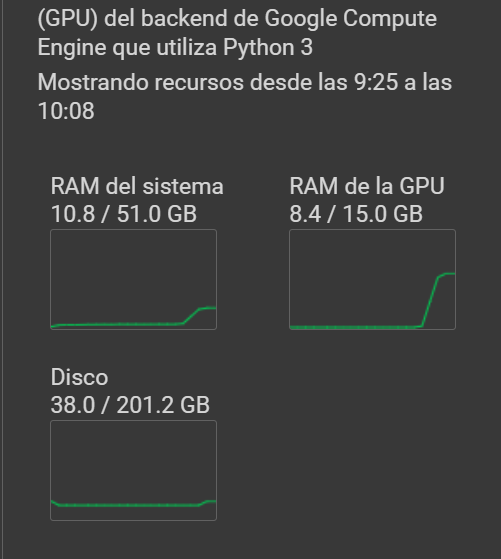

El tiempo de ejecución de la conversión fue de 5 minutos y 1 segundo

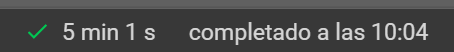

Podemos verificar el número de imágenes codificadas en el conjunto de entrenamiento y en el de validación

In [ ]:
# Número de imágenes codificadas en el conjunto de entrenamiento
num_images_train = len(processed_images_train)

# Número de imágenes codificadas en el conjunto de validación
num_images_valid = len(processed_images_valid)

print(f"Total de imágenes codificadas en entrenamiento: {num_images_train}")
print(f"Total de imágenes codificadas en validación: {num_images_valid}")


Total de imágenes codificadas en entrenamiento: 44191
Total de imágenes codificadas en validación: 11048


## GUARDANDO LOS DATOS CODIFICADOS

Vamos a guardar la codificación también en formato HDF5 ya que es una excelente opción para almacenar grandes conjuntos de datos debido a su eficiencia y capacidad para manejar conjuntos de datos multidimensionales. También son compatibles con una amplia gama de lenguajes de programación y plataformas, lo que los hace útiles para compartir datos en un formato más universal.


Para guardar los datos en HDF5, vamos a concatenar los tensores. Esto ofrece algunos beneficios como por ejemplo al almacenar los datos como un gran array (o tensor) se puede aprovechar las capacidades de HDF5 para realizar acceso y análisis eficiente a grandes conjuntos de datos. Este formato también permite realizar operaciones como seleccionar subconjuntos de datos sin necesidad de cargar todo el archivo en memoria, lo cual es más eficiente si los datos están almacenados en un formato continuo y compacto.

Otra ventaja es una mejor organización y manejo de los datos. Al tener todos lo datos en un solo array se simplifica la estructura del archivo HDF5 lo que puede facilitar su posterior manejo y procesamiento. Esto también favorece la implementación de operaciones de procesamiento de datos que son comunes en flujos de trabajo de aprendizaje automático, como la normalización de batches o la división de datos en batches para el entrenamiento.

Finalmente, debemos mencionar el beneficio de la interoperabilidad. Los archivos HDF5 son ampliamente utilizados en diversas aplicaciones científicas y de ingeniería, lo que hace que los datos sean fácilmente accesibles a través de diferentes plataformas y lenguajes de programación (Python, R, MATLAB, etc.). Tener los datos en un formato estructurado y bien organizado facilita compartirlos y utilizarlos en diferentes herramientas y contextos.


Como vamos a guardar los datos en un archivo, no necesitamos mantenerlos en la GPU. Así que movemos los tensores a la CPU antes de concatenarlos y luego guardarlos desde allí. Esto evitará el uso de la memoria de la GPU para estas operaciones.

In [ ]:
import torch
import h5py

# Función para guardar en formato HDF5
def save_to_hdf5(images, steering, file_name):
    with h5py.File(file_name, 'w') as f:
        f.create_dataset('images', data=images, compression="gzip")
        f.create_dataset('steering', data=steering, compression="gzip")

# Mover tensores a la CPU y concatenar para el conjunto de entrenamiento
images_tensor_train = torch.cat([img.cpu() for img in processed_images_train])
steering_tensor_train = torch.cat([steer.cpu() for steer in encoded_steering_train])

# Mover tensores a la CPU y concatenar para el conjunto de validación
images_tensor_valid = torch.cat([img.cpu() for img in processed_images_valid])
steering_tensor_valid = torch.cat([steer.cpu() for steer in encoded_steering_valid])

# Guardar en formato PyTorch
#torch.save({'images': images_tensor_train, 'steering': steering_tensor_train}, 'encoded_concat_training_dataset.pth')
#torch.save({'images': images_tensor_valid, 'steering': steering_tensor_valid}, 'encoded_concat_validation_dataset.pth')

# Guardar en formato HDF5
save_to_hdf5(images_tensor_train.numpy(), steering_tensor_train.numpy(), 'training_data.hdf5')
save_to_hdf5(images_tensor_valid.numpy(), steering_tensor_valid.numpy(), 'validation_data.hdf5')


La ejecución de este código tomó 1 minuto y 16 segundos. Y la diferencia en tamaño es abismal con relación a los archivo en formato de PyTorch. Esto es porque al guardar datos en formato HDF5, se puede aplicar compresión para reducir significativamente el tamaño del archivo. La compresión en HDF5 es muy eficiente y puede ajustarse para equilibrar entre velocidad y ratio de compresión. En nuestro código, se utiliza la compresión "gzip" que es bastante efectiva para reducir el tamaño de los datos almacenados, especialmente para conjuntos de datos grandes y homogéneos como imágenes.


Los archivos en formato .pth están optimizados para ser utilizados con PyTorch y están diseñados para cargar rápidamente durante el proceso de entrenamiento o inferencia. Esto puede llevar a un enfoque más directo y menos optimizado en términos de almacenamiento de espacio comparado con HDF5.

Con el siguiente código movemos los archivos generados a Google Drive

In [ ]:
import shutil

shutil.copy2('/content/encoded_training_dataset.pth', '/content/drive/MyDrive/UOC/TFM/Spike Encoding/encoded_training_dataset.pth')
shutil.copy2('/content/encoded_validation_dataset.pth', '/content/drive/MyDrive/UOC/TFM/Spike Encoding/encoded_validation_dataset.pth')
shutil.copy2('/content/training_data.hdf5', '/content/drive/MyDrive/UOC/TFM/Spike Encoding/training_data.hdf5')
shutil.copy2('/content/validation_data.hdf5', '/content/drive/MyDrive/UOC/TFM/Spike Encoding/validation_data.hdf5')

'/content/drive/MyDrive/UOC/TFM/Spike Encoding/validation_data.hdf5'